In [61]:
import numpy as np
import matplotlib.pyplot as plt

func = [
    lambda x, y: np.sin(x) - y - x*y,
    lambda x, y: x + y,
]

def find_indexes(arr, x):
    a = -1
    b = -1
    for i in range(len(arr) + 1):
        if arr[i] <= x:
            a = i
        elif arr[i] > x:
            b = i
            break
    if a != -1 and b != -1:
        return a, b
    else:
        return None

class Bilinear:
    def __init__(self, x, y, z):
        self.x = x[0, :]
        self.y = y[:, 0]
        self. z = np.matrix(z).transpose()
    def calculate(self, x, y):
        if x in self.x and y in self.y:
            return self.z[np.where(self.x == x), np.where(self.y == y)].item(0)
        if x in self.x:
            ind_y_, ind_y__ = find_indexes(self.y, y)
            y_, y__ = self.y[ind_y_], self.x[ind_y__]
            z_ = self.z[np.where(self.x == x), ind_y_].item(0)
            z__ = self.z[np.where(self.x == x), ind_y__].item(0)
            return z_*(y__ - y)/(y__ - y_) + z__*(y - y_)/(y__ - y_)
        if y in self.y:
            ind_x_, ind_x__ = find_indexes(self.x, x)
            x_, x__ = self.x[ind_x_], self.x[ind_x__]
            z_ = self.z[ind_x_, np.where(self.y == y)].item(0)
            z__ = self.z[ind_x__, np.where(self.y == y)].item(0)
            return z_*(x__ - x)/(x__ - x_) + z__*(x - x_)/(x__ - x_)
        else:
            ind_x_, ind_x__ = find_indexes(self.x, x)
            x_, x__ = self.x[ind_x_], self.x[ind_x__]
            ind_y_, ind_y__ = find_indexes(self.y, y)
            y_, y__ = self.y[ind_y_], self.x[ind_y__]
            z11 = self.z[ind_x_, ind_y_]
            z12 = self.z[ind_x__, ind_y__]
            z21 = self.z[ind_x_, ind_y_]
            z22 = self.z[ind_x__, ind_y__]
            fx1 =  z11*(x__ - x)/(x__ - x_) + z21*(x - x_)/(x__ - x_)
            fx2 =  z12*(x__ - x)/(x__ - x_) + z22*(x - x_)/(x__ - x_)
            return fx1*(y__ - y)/(y__ - y_) + fx2*(y - y_)/(y__ - y_)
    def calculate_mesh(self, x, y):
        rows = len(x)
        cols = len(x[0])
        mesh = []
        x = np.array(x).flatten()
        y = np.array(y).flatten()
        for x_, y_ in zip(x, y):
            mesh.append(self.calculate(x_, y_))
        return np.array(mesh).reshape((rows, cols))


err:  2.8338530680671945


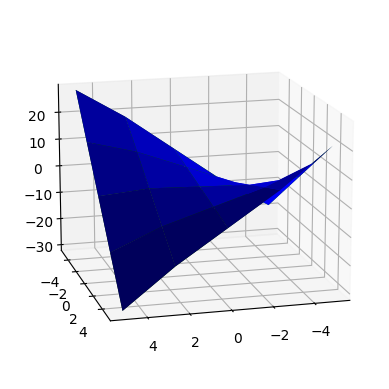

In [68]:
a = -5
b = 5
plot_n = 5
n = 10
funct = func[0]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
plot_x, plot_y = np.meshgrid(np.linspace(a, b, plot_n), np.linspace(a, b, plot_n))
plot_z = funct(plot_x, plot_y)


int_x, int_y = np.meshgrid(np.linspace(a, b, n), np.linspace(a, b, n))
k = Bilinear(int_x, int_y, funct(int_x, int_y))
int_z = k.calculate_mesh(plot_x, plot_y)

plot_z_ = func[1](plot_x, plot_y)

print("err: ", np.linalg.norm(np.matrix(int_z - plot_z), np.inf))
ax.plot_surface(plot_x, plot_y, int_z, color='g')
ax.plot_surface(plot_x, plot_y, plot_z, color='b')
ax.view_init(15, 75)
plt.show()